<a href="https://colab.research.google.com/github/juanserrano90/codelatam/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
from os.path import isfile

import numpy as np
import pandas as pd
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

# from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset import and pre-processing for image generation

In [4]:
url = "https://github.com/juanserrano90/codelatam/raw/main/data/sn_data.parquet"
df_raw = pd.read_parquet(url)

In [5]:
df_raw.head()

,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
SN Name,,,,,,,,,,,,,,,,,,,,,
sn2008ar,Ia-norm,0,Ia,0,-8.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-7.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-6.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-4.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-3.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_raw.describe()

,SN Subtype ID,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,2518.69,2522.1,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
count,5001.000000,5001.000000,5001.000000,5001.0,5001.0,5.001000e+03,5001.000000,5001.000000,5001.000000,5001.000000,...,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000,5001.000000,5001.0,5001.0
mean,3.993201,0.655069,36.539334,0.0,0.0,7.998400e-07,0.000005,0.000010,0.000007,0.000019,...,0.000008,0.000093,0.000039,0.000055,0.000027,0.000024,0.00001,0.000005,0.0,0.0
std,5.162127,1.024109,88.017382,0.0,0.0,2.827296e-05,0.000130,0.000244,0.000330,0.000641,...,0.005317,0.004881,0.003690,0.002672,0.001601,0.001002,0.00043,0.000113,0.0,0.0
min,0.000000,0.000000,-82.700000,0.0,0.0,0.000000e+00,-0.002000,-0.003000,-0.008000,-0.005000,...,-0.059000,-0.038000,-0.059000,-0.021000,-0.012000,-0.008000,-0.00300,-0.001000,0.0,0.0
25%,0.000000,0.000000,-0.200000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
50%,1.000000,0.000000,11.900000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
75%,8.000000,1.000000,36.100000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
max,16.000000,3.000000,1103.000000,0.0,0.0,1.000000e-03,0.004000,0.009000,0.015000,0.025000,...,0.107000,0.153000,0.071000,0.052000,0.036000,0.022000,0.00900,0.002000,0.0,0.0


the data is stored in a somewhat bizzarro way, with the wavelength as the column name and the row as the SN

In [7]:
wavelength = np.array([float(c) for c in df_raw.columns[5:]])

In [8]:
wavelength.shape

(1024,)

In [9]:
df_raw.loc[(df_raw.index == "sn2008ar") * (df_raw["Spectral Phase"] == -2.7)]

,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
SN Name,,,,,,,,,,,,,,,,,,,,,
sn2008ar,Ia-norm,0,Ia,0,-2.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


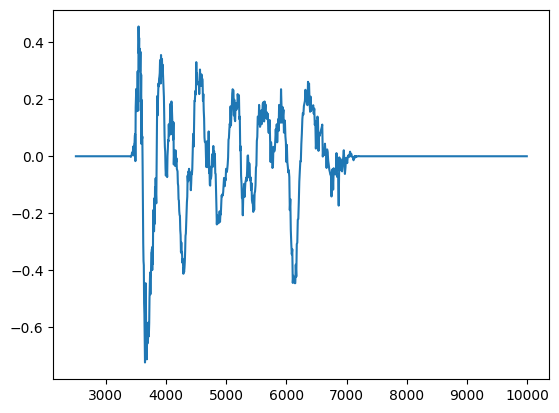

In [10]:
plt.plot(wavelength, df_raw.loc[(df_raw.index == "sn2008ar") * (df_raw["Spectral Phase"] == -2.7)].iloc[:, 5:].values[0])

## Explore data:

is there padding? invalid data, spurious entries?

### unique SN

In [11]:
print('Number of SNs:', len(df_raw.index.categories))

Number of SNs: 518


### unique SN subtypes

In [12]:
print('SN subtypes:', df_raw['SN Subtype'].unique())

SN subtypes: ['Ia-norm', 'Ia-91T', 'Ia-csm', 'Ia-91bg', 'Ib-norm', ..., 'Ic-broad', 'Ic-pec', 'IIn', 'Ibn', 'Ib-pec']
Length: 17
Categories (17, object): ['II-pec', 'IIL', 'IIP', 'IIb', ..., 'Ibn', 'Ic-broad', 'Ic-norm', 'Ic-pec']


In [13]:
subtypes  = df_raw['SN Subtype'].unique()

for i in subtypes:
  print(i)

Ia-norm
Ia-91T
Ia-csm
Ia-91bg
Ib-norm
Iax
Ia-pec
Ic-norm
IIP
IIL
IIb
II-pec
Ic-broad
Ic-pec
IIn
Ibn
Ib-pec


### unique SN main types

In [14]:
types = df_raw['SN Maintype'].unique()
print('Number of SN types:', len(types))
print('types:', list(types))

Number of SN types: 4
types: ['Ia', 'Ib', 'Ic', 'II']


In [15]:
# I want the name to be on the first column, reset index
df_raw = df_raw.reset_index()

### How many SNs of each type

In [16]:
grouped = df_raw.groupby(['SN Maintype', 'SN Name'], observed=True)['SN Name'].value_counts()

In [17]:
grouped.groupby(level=0, observed=True).count()

,count
SN Maintype,
II,11
Ia,414
Ib,46
Ic,47


In [18]:
grouped.index.levels[0].values

['II', 'Ia', 'Ib', 'Ic']
Categories (4, object): ['II', 'Ia', 'Ib', 'Ic']

### Typical series length (in time)

In [19]:
df_raw.groupby('SN Maintype', observed=True)['SN Maintype'].value_counts()

,count
SN Maintype,
II,494
Ia,3288
Ib,644
Ic,575


In [20]:
# group by object and calculate the typical series length
df_raw.groupby('SN Name', observed=True)['SN Name'].value_counts().sort_values(ascending=False)

,count
SN Name,
sn1987A,241
sn1993J,73
sn2005cf,67
sn2003du,60
sn1998S,57
...,...
sn07bd,1
sn07al,1
sn2006cq,1


In [21]:
df_raw.groupby('SN Name', observed=True)['SN Name'].value_counts().sort_values(ascending=False).mean()

9.654440154440154

In [22]:
# group by object and calculate the typical series length
series_length = (df_raw.groupby('SN Name', observed=True)['Spectral Phase'].max()-df_raw.groupby('SN Name', observed=True)['Spectral Phase'].min()).sort_values(ascending=False).mean()

print('Typical series length is:', series_length)

Typical series length is: 74.18314092664092


### NaNs?

In [23]:
df_raw.isna().sum().max()

0

In [24]:
print('number of nans:', df_raw.isna().sum().max())

number of nans: 0


In [25]:
df_raw.head()

,SN Name,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
0,sn2008ar,Ia-norm,0,Ia,0,-8.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sn2008ar,Ia-norm,0,Ia,0,-7.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sn2008ar,Ia-norm,0,Ia,0,-6.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sn2008ar,Ia-norm,0,Ia,0,-4.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sn2008ar,Ia-norm,0,Ia,0,-3.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
sn2008ar = df_raw.loc[df_raw['SN Name'] == "sn2008ar"]
sn2008ar.shape

(18, 1030)

### Wavelength span

In [27]:
print(wavelength.min(), wavelength.mean(), wavelength.max())

2501.69 5410.10734375 9993.24


In [28]:
# usar 2500 a 10000
xlim = [2500, 10000]

### Flux span

In [29]:
df_raw.head()

,SN Name,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
0,sn2008ar,Ia-norm,0,Ia,0,-8.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sn2008ar,Ia-norm,0,Ia,0,-7.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sn2008ar,Ia-norm,0,Ia,0,-6.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sn2008ar,Ia-norm,0,Ia,0,-4.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sn2008ar,Ia-norm,0,Ia,0,-3.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
print(df_raw.iloc[:,6:].mean().mean(), 3*df_raw.iloc[:,6:].std().std())

-0.00026101225067486555 6.807673554040658


In [31]:
# which rows have the max flux value?
print(df_raw.iloc[:,6:].max().max())
# which row is that?
print(df_raw.iloc[:,6:].max().idxmax())

2071.001
3301.9


In [32]:
df_raw.loc[df_raw['3301.9'] == 2071.001]

,SN Name,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
4631,iPTF13bvn,Ib-norm,6,Ib,1,-12.7,0.0,0.0,0.0,0.0,...,-0.053,-0.014,-0.027,-0.015,-0.003,-0.001,-0.001,0.0,0.0,0.0


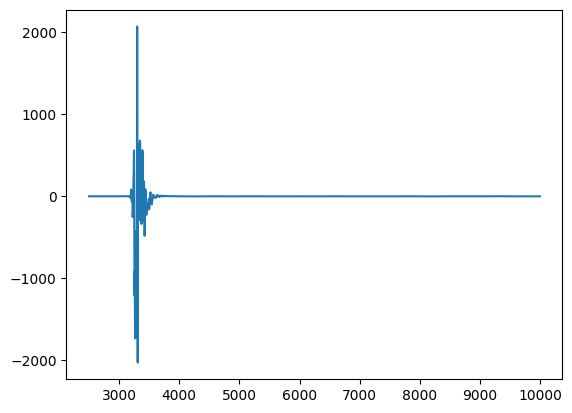

In [33]:
plt.plot(wavelength, df_raw.loc[df_raw['3301.9'] == 2071.001].values[0,6:])
#plt.xlim(3000,4000)

In [34]:
# remove that row
df_ = df_raw.drop(df_raw.loc[df_raw['3301.9'] == 2071.001].index)

In [35]:
print(df_.iloc[:,6:].mean().mean(), df_.iloc[:,6:].std().std())

0.002066028124999999 0.12497102525820329


In [36]:
df_.iloc[:,6:].max().sort_values(ascending=False)[0:20]

,0
4190.28,56.627
3537.93,54.727
4581.92,52.980
4195.95,47.553
4230.18,25.877
4600.57,22.404
3490.35,18.620
3664.68,16.329
4465.56,16.155
3315.34,15.685


In [37]:
print(df_.iloc[:,6:].min().min(), df_.iloc[:,6:].max().max())

-17.943 56.627


### Standarize in Y axis

In [38]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

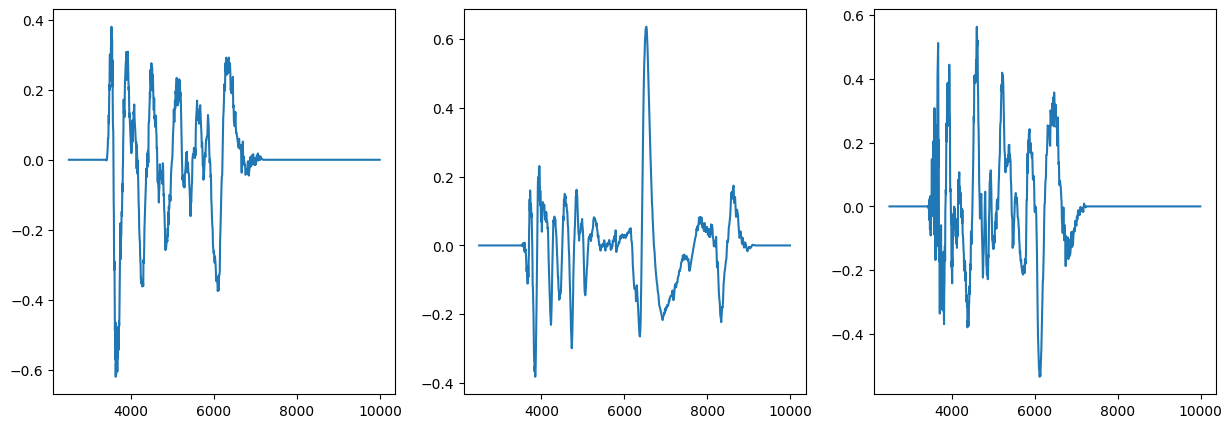

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(wavelength, df_.iloc[0].values[6:])
ax[1].plot(wavelength, df_.iloc[1000].values[6:])
ax[2].plot(wavelength, df_.iloc[2000].values[6:])

In [40]:
# how to standarize?
# min max scaling (daniel)

$y_{scaled} = \frac{y-y_{min}}{y_{max}-y_{min}}$

In [41]:
minmax_scaler = MinMaxScaler(feature_range = (0,1))
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

In [42]:
scalings = {}
# minmax
scalings['minmax'] = minmax_scaler.fit_transform(df_.iloc[:,6:].transpose()).transpose()
# standard
scalings['standard'] = standard_scaler.fit_transform(df_.iloc[:,6:].transpose()).transpose()
# robust
scalings['robust'] = robust_scaler.fit_transform(df_.iloc[:,6:].transpose()).transpose()

In [43]:
scalings['standard'].shape

(5000, 1024)

In [44]:
for i, k in enumerate(scalings.keys()):
  print(i,k)

0 minmax
1 standard
2 robust


Text(0.5, 1.0, 'Scaling estrategies comparision for 3 spectrums')

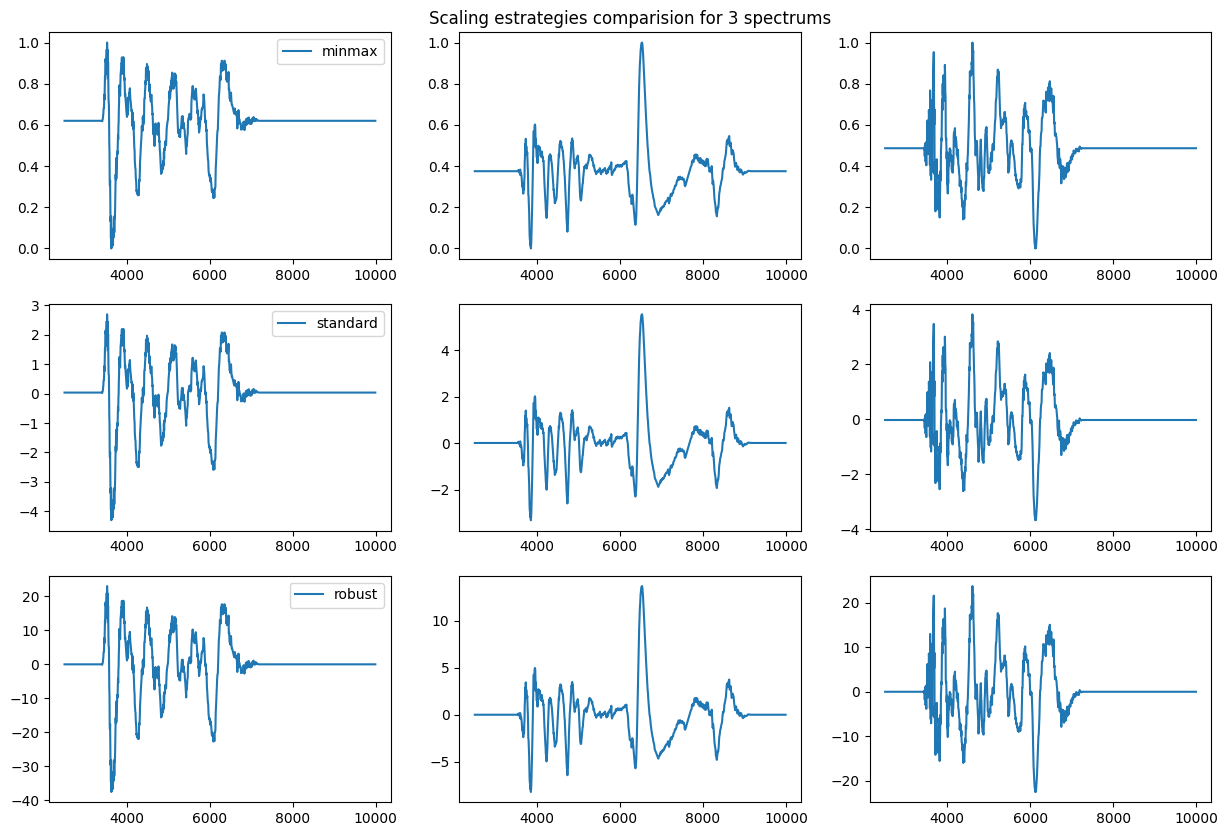

In [45]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, keys in enumerate(scalings.keys()):
  ax[i,0].plot(wavelength, scalings[keys][0], label=keys)
  ax[i,1].plot(wavelength, scalings[keys][1000], label=keys)
  ax[i,2].plot(wavelength, scalings[keys][2000], label=keys)
  ax[i,0].legend()
ax[0,1].set_title('Scaling estrategies comparision for 3 spectrums')

In [46]:
# lets use minmax scaling
df_.iloc[:,6:] = scalings['minmax']

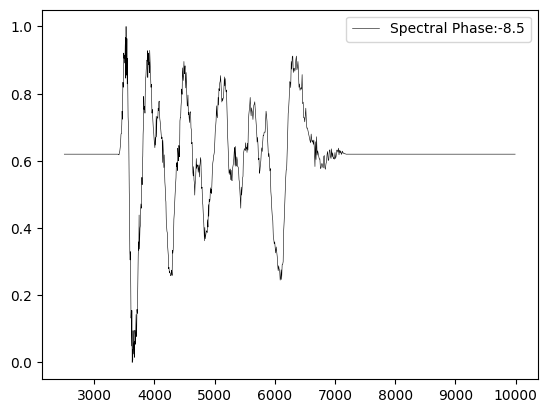

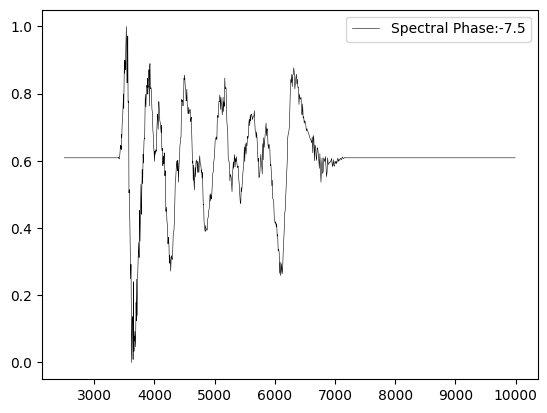

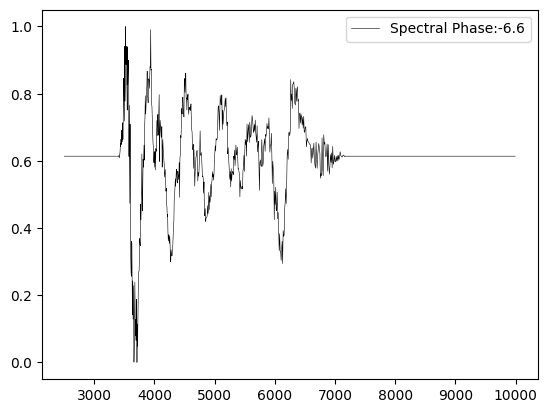

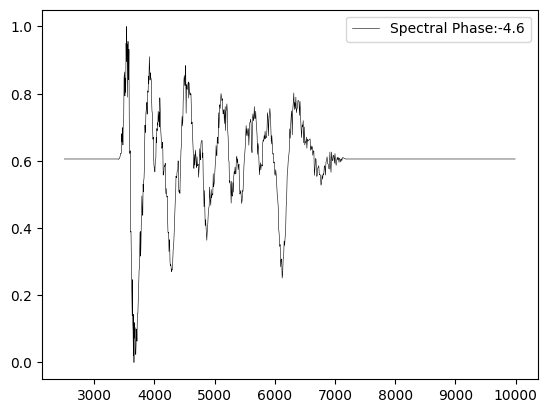

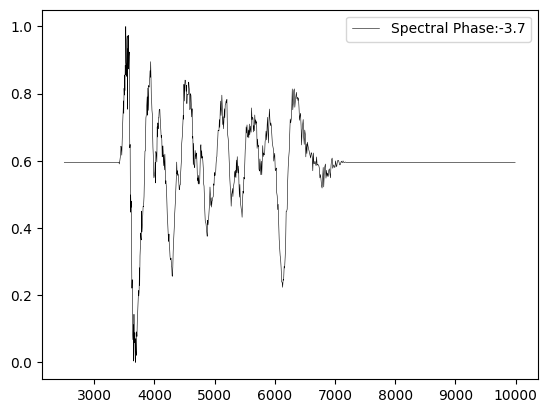

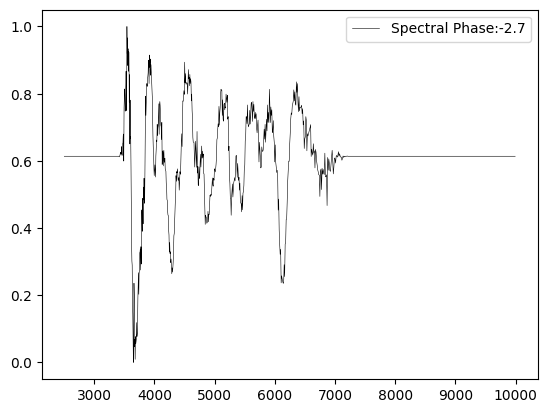

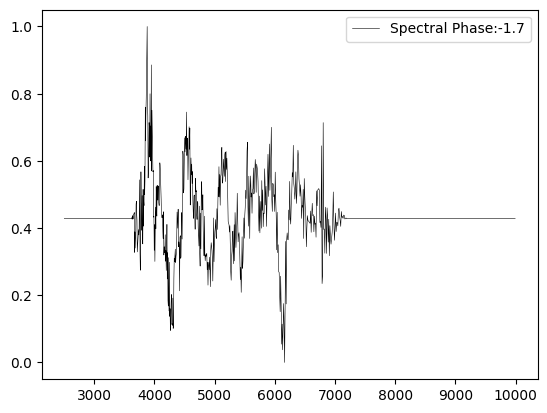

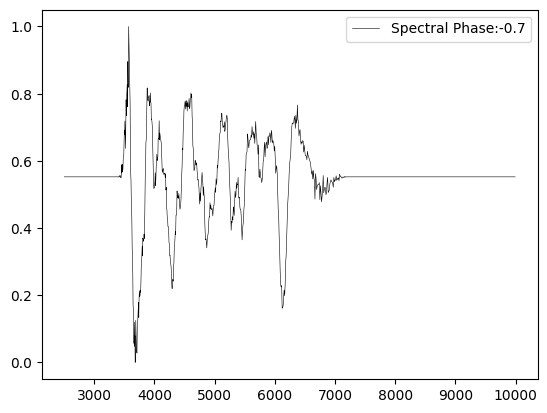

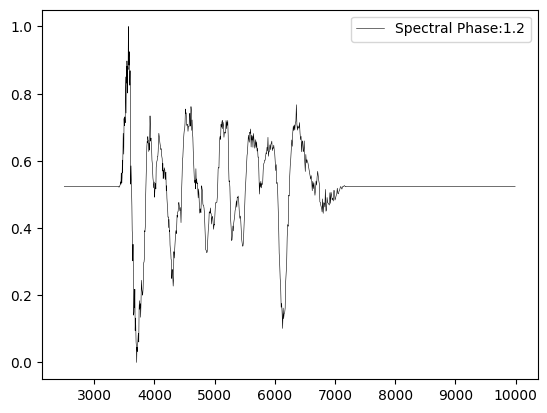

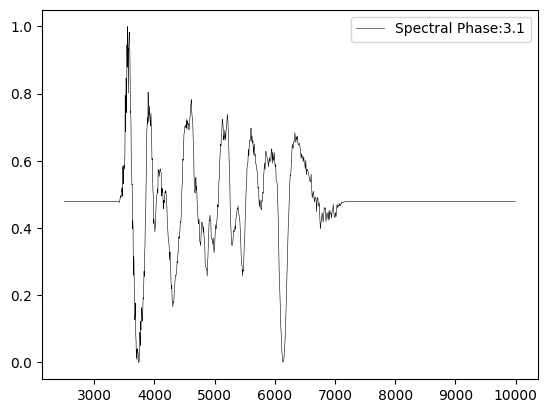

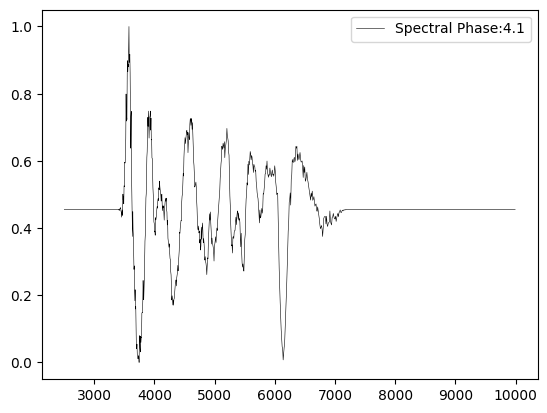

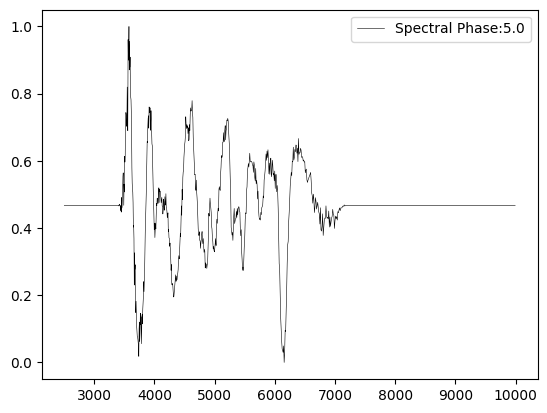

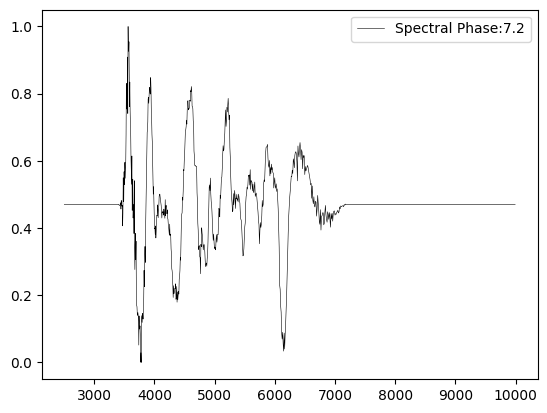

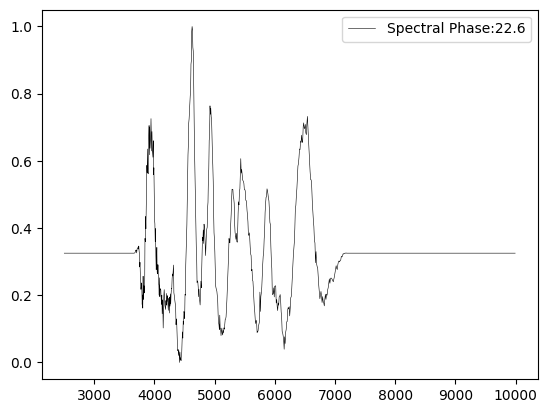

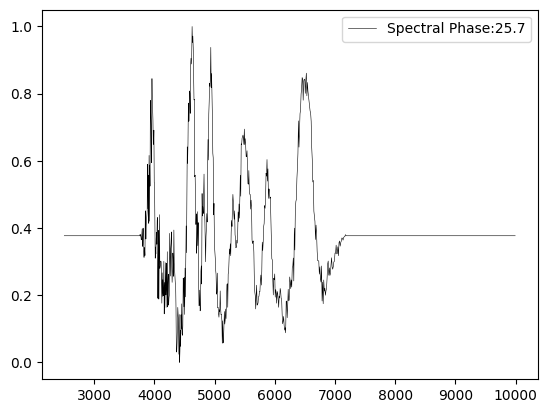

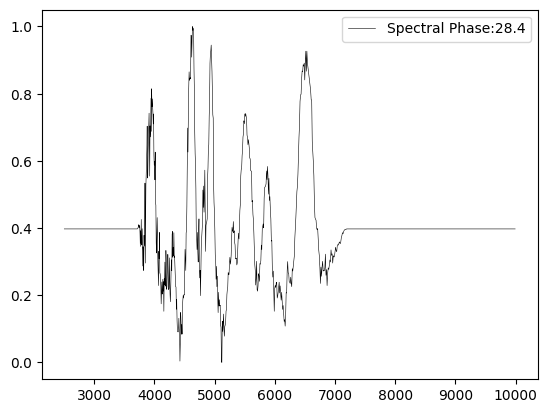

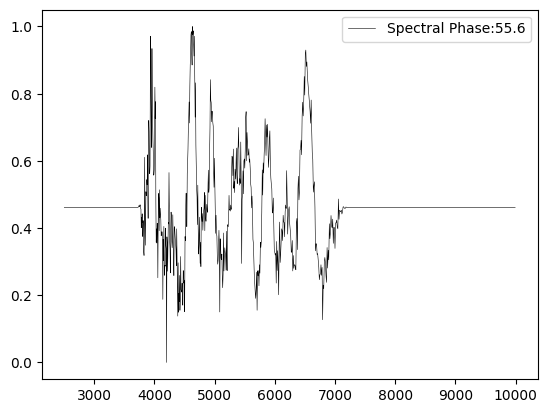

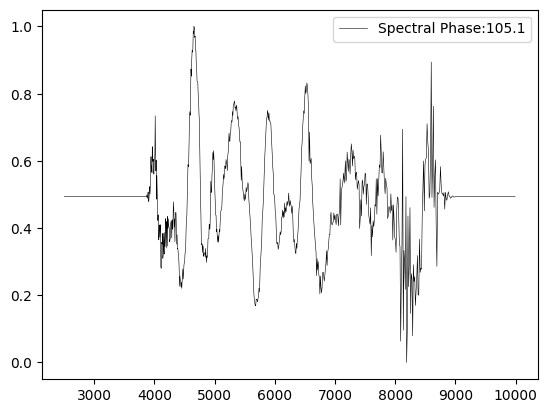

In [47]:
for i in range(18):
  plt.figure()
  plt.plot(wavelength, df_.iloc[:,6:].values[i], lw=0.4, ls='-', color='k',
           label='Spectral Phase:'+str(df_['Spectral Phase'].iloc[i]))
  plt.legend()

### Flux span now?

In [48]:
# mean of mean of fluxes
print(df_.iloc[:,6:].mean().mean())
# mean of std of fluxes
print(df_.iloc[:,6:].std().mean())

0.44939688173721637
0.15765526341735236


In [49]:
# which rows have the max flux value?
print(df_.iloc[:,6:].max().max())
print(df_.iloc[:,6:].min().min())
# which row is that?
print(df_.iloc[:,6:].max().idxmax())
# wavelength range
print(wavelength.min(), wavelength.max())

1.0000000000000002
0.0
2739.22
2501.69 9993.24


### Saving plots

In [50]:
# DANIEL
# For training, I used the base CLIP or ViT model with a resolution of 224x224 pixels
# and created images with a figure size of 2.24 x 2.24 inches at 100 dpi.

In [51]:
# my_dpi = 260
# fig, ax = plt.subplots(figsize=(224/my_dpi,224/my_dpi), dpi=my_dpi)
# ax.plot(wavelength, df_.iloc[0,6:].values, lw=0.3, ls='-', color='k', alpha=1)
# ax.axis('off')
# ax.set_box_aspect(1)
# ax.set_xlim(xlim[0], xlim[1])
# ax.set_ylim(0,1)
# plt.savefig('sn2008ar.png', bbox_inches='tight', dpi=my_dpi)
# plt.show()

In [52]:
df_.iloc[0,0]

'sn2008ar'

In [53]:
# # save at 100 dpi and 224x224 pixels
# my_dpi = 100
# fig, ax = plt.subplots(figsize=(2.65,2.65), dpi=my_dpi)
# ax.plot(wavelength, df_.iloc[0,6:].values, lw=1, ls='-', color='k', alpha=1)
# ax.axis('off')
# ax.set_xlim(xlim[0], xlim[1])
# ax.set_ylim(0,1)
# ax.set_box_aspect(1)
# plt.savefig('asd.png', bbox_inches='tight', dpi=my_dpi)
# plt.show()

In [54]:
# which info to save?
keys = df_.columns[0:7]
keys

Index(['SN Name', 'SN Subtype', 'SN Subtype ID', 'SN Maintype',
       'SN Maintype ID', 'Spectral Phase', '2501.69'],
      dtype='object')

In [55]:
# we need SN name, SN Subtype ID, SN Maintype ID, Spectral Phase: 0, 2, 4, 5

In [56]:
xlim

[2500, 10000]

In [57]:
df_.shape

(5000, 1030)

In [58]:
# # save all plots in a folder
# my_dpi = 100
# for i in range(1000):
#   fig, ax = plt.subplots(figsize=(2.65,2.65), dpi=my_dpi)
#   ax.plot(wavelength, df_.iloc[i,6:].values, lw=1, ls='-', color='k', alpha=1)
#   ax.axis('off')
#   ax.set_xlim(xlim[0], xlim[1])
#   ax.set_ylim(0,1)
#   ax.set_box_aspect(1)
#   plt.savefig('./images/'+df_.iloc[i,0]+'_'+str(df_.iloc[i,2])+'_'+str(df_.iloc[i,4])+'_'+str(df_.iloc[i,5])+'_'+str(i)+'.png',
#               bbox_inches='tight', dpi=my_dpi)

In [59]:
# # save all plots in a folder
# my_dpi = 100
# for i in range(1000,2000):
#   fig, ax = plt.subplots(figsize=(2.65,2.65), dpi=my_dpi)
#   ax.plot(wavelength, df_.iloc[i,6:].values, lw=1, ls='-', color='k', alpha=1)
#   ax.axis('off')
#   ax.set_xlim(xlim[0], xlim[1])
#   ax.set_ylim(0,1)
#   ax.set_box_aspect(1)
#   plt.savefig('./images/'+df_.iloc[i,0]+'_'+str(df_.iloc[i,2])+'_'+str(df_.iloc[i,4])+'_'+str(df_.iloc[i,5])+'_'+str(i)+'.png',
#               bbox_inches='tight', dpi=my_dpi)

In [60]:
# # save all plots in a folder
# my_dpi = 100
# for i in range(2000,3000):
#   fig, ax = plt.subplots(figsize=(2.65,2.65), dpi=my_dpi)
#   ax.plot(wavelength, df_.iloc[i,6:].values, lw=1, ls='-', color='k', alpha=1)
#   ax.axis('off')
#   ax.set_xlim(xlim[0], xlim[1])
#   ax.set_ylim(0,1)
#   ax.set_box_aspect(1)
#   plt.savefig('./images/'+df_.iloc[i,0]+'_'+str(df_.iloc[i,2])+'_'+str(df_.iloc[i,4])+'_'+str(df_.iloc[i,5])+'_'+str(i)+'.png',
#               bbox_inches='tight', dpi=my_dpi)

In [61]:
# # save all plots in a folder
# my_dpi = 100
# for i in range(3000,4000):
#   fig, ax = plt.subplots(figsize=(2.65,2.65), dpi=my_dpi)
#   ax.plot(wavelength, df_.iloc[i,6:].values, lw=1, ls='-', color='k', alpha=1)
#   ax.axis('off')
#   ax.set_xlim(xlim[0], xlim[1])
#   ax.set_ylim(0,1)
#   ax.set_box_aspect(1)
#   plt.savefig('./images/'+df_.iloc[i,0]+'_'+str(df_.iloc[i,2])+'_'+str(df_.iloc[i,4])+'_'+str(df_.iloc[i,5])+'_'+str(i)+'.png',
#               bbox_inches='tight', dpi=my_dpi)

In [62]:
# # save all plots in a folder
# my_dpi = 100
# for i in range(4000,5000):
#   fig, ax = plt.subplots(figsize=(2.65,2.65), dpi=my_dpi)
#   ax.plot(wavelength, df_.iloc[i,6:].values, lw=1, ls='-', color='k', alpha=1)
#   ax.axis('off')
#   ax.set_xlim(xlim[0], xlim[1])
#   ax.set_ylim(0,1)
#   ax.set_box_aspect(1)
#   plt.savefig('./images/'+df_.iloc[i,0]+'_'+str(df_.iloc[i,2])+'_'+str(df_.iloc[i,4])+'_'+str(df_.iloc[i,5])+'_'+str(i)+'.png',
#               bbox_inches='tight', dpi=my_dpi)

In [63]:
''' In this section of the code, we separate the images using the name of each file.
    The second number of each file (i.e. the first value in between underscores, e.g.
    sn2004dn_10_2_55.0_4458.png it would be 10) represents the subtype.
    At the stage of the process on August 26th, 2024 we will work with 3 categories:
    0 - Ia-norm
    1 - Ia-pec (all Ia that are not Ia-norm)
    2 - Other (all supernovae that is not Ia).
    Here we will first determine the index and categorize each index as stated above.'''

' In this section of the code, we separate the images using the name of each file.\n    The second number of each file (i.e. the first value in between underscores, e.g.\n    sn2004dn_10_2_55.0_4458.png it would be 10) represents the subtype.\n    At the stage of the process on August 26th, 2024 we will work with 3 categories:\n    0 - Ia-norm\n    1 - Ia-pec (all Ia that are not Ia-norm)\n    2 - Other (all supernovae that is not Ia).\n    Here we will first determine the index and categorize each index as stated above.'

In [64]:
df_.head()

,SN Name,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
0,sn2008ar,Ia-norm,0,Ia,0,-8.5,0.620000,0.620000,0.620000,0.620000,...,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000
1,sn2008ar,Ia-norm,0,Ia,0,-7.5,0.609115,0.609115,0.609115,0.609115,...,0.609115,0.609115,0.609115,0.609115,0.609115,0.609115,0.609115,0.609115,0.609115,0.609115
2,sn2008ar,Ia-norm,0,Ia,0,-6.6,0.613961,0.613961,0.613961,0.613961,...,0.613961,0.613961,0.613961,0.613961,0.613961,0.613961,0.613961,0.613961,0.613961,0.613961
3,sn2008ar,Ia-norm,0,Ia,0,-4.6,0.605621,0.605621,0.605621,0.605621,...,0.605621,0.605621,0.605621,0.605621,0.605621,0.605621,0.605621,0.605621,0.605621,0.605621
4,sn2008ar,Ia-norm,0,Ia,0,-3.7,0.595781,0.595781,0.595781,0.595781,...,0.595781,0.595781,0.595781,0.595781,0.595781,0.595781,0.595781,0.595781,0.595781,0.595781


# Generate Dataset class

### Get labels for dataset creation

In [65]:
subtypes  = df_raw['SN Subtype'].unique()
subtypes_ID = df_raw['SN Subtype ID'].unique()

for subtype, subtype_ID in zip(subtypes, subtypes_ID):
  print(subtype, subtype_ID)


Ia-norm 0
Ia-91T 1
Ia-csm 3
Ia-91bg 2
Ib-norm 6
Iax 4
Ia-pec 5
Ic-norm 10
IIP 13
IIL 14
IIb 8
II-pec 16
Ic-broad 11
Ic-pec 12
IIn 15
Ibn 7
Ib-pec 9


### Get pre-processed images from google drive

In [66]:
!git clone https://github.com/juanserrano90/codelatam

Cloning into 'codelatam'...
remote: Enumerating objects: 5082, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 5082 (delta 37), reused 38 (delta 10), pack-reused 4996 (from 1)
Receiving objects: 100% (5082/5082), 44.85 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [67]:
# import os
# image_folder_0 = '/content/codelatam/augmented_images/0'
# image_folder_1 = '/content/codelatam/augmented_images/1'
# image_folder_2 = '/content/codelatam/augmented_images/2'

# image_files_0 = os.listdir(image_folder_0)
# image_files_1 = os.listdir(image_folder_1)
# image_files_2 = os.listdir(image_folder_2)

# from PIL import Image
# image_names_0 = []
# for image_file in image_files_0:
#   image_path = os.path.join(image_folder_0, image_file)
#   image_names_0.append(image_file)

# image_names_1 = []
# for image_file in image_files_1:
#   image_path = os.path.join(image_folder_1, image_file)
#   image_names_1.append(image_file)

# image_names_2 = []
# for image_file in image_files_2:
#   image_path = os.path.join(image_folder_2, image_file)
#   image_names_2.append(image_file)

# image_names = image_names_0 + image_names_1 + image_names_2

# print(len(image_names))
# print(image_names)

import os
image_folder = '/content/codelatam/data/images'

image_files = os.listdir(image_folder)

from PIL import Image
image_names = []
for image_file in image_files:
  image_path = os.path.join(image_folder, image_file)
  image_names.append(image_file)

print(len(image_names))
print(image_names)

5000
['sn2005cs_13_3_1.0_2939.png', 'sn2005cf_0_0_24.3_2723.png', 'sn2006X_0_0_11.2_3296.png', 'sn2006ep_6_1_12.5_4748.png', 'sn2007le_0_0_9.5_2639.png', 'sn1991T_1_0_9.5_2249.png', 'sn94D_0_0_-7.7_123.png', '13ge_10_2_101.5_4059.png', 'sn1999em_13_3_72.0_364.png', 'sn2013dx_11_2_6.4_4903.png', 'sn1999gi_13_3_160.4_900.png', 'sn2012P_8_1_1.04_4162.png', 'sn1999aa_1_0_14.5_3018.png', 'sn00dk_0_0_36.679_2592.png', 'sn1987A_16_3_266.9_1812.png', 'sn2005kl_10_2_-4.0_4258.png', 'sn1997ef_11_2_40.3_3675.png', 'sn2005ke_2_0_0.5_1959.png', 'sn2013dx_11_2_-5.0_4894.png', 'sn1998dh_0_0_45.0_3708.png', 'sn2004bk_0_0_6.4_160.png', 'sn1998dx_0_0_5.9_1115.png', 'sn1994Q_0_0_18.6_1128.png', 'sn1991bg_2_0_25.0_3216.png', 'sn1993J_8_1_325.9_4247.png', 'sn1999aw_1_0_0.0_1162.png', 'sn1991bg_2_0_53.9_3226.png', 'sn2009jf_6_1_70.4_4787.png', 'sn1987A_16_3_182.1_1796.png', 'sn91T_1_0_24.8_3390.png', 'sn2004et_13_3_82.5_1021.png', 'sn2001ep_0_0_6.8_179.png', 'sn1990B_10_2_28.3_317.png', 'sn2004gv_6_1_13.3_4

# Part of Daniel's tutorial

In [68]:
!pip install -q webdataset transformers torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 50.4 MB/s eta 0:00:00


In [69]:
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import torch

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import webdataset as wds
import random
import io
import os

from transformers import ViTImageProcessor, ViTModel
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

from torchmetrics.classification import F1Score


In [70]:
# Here, choose the GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Convert PIL Image to Pytorch's tensor

In [71]:
len(image_names)

5000

In [72]:
subtypes  = df_raw['SN Subtype'].unique()
subtypes_ID = df_raw['SN Subtype ID'].unique()

for subtype, subtype_ID in zip(subtypes, subtypes_ID):
  print(subtype, subtype_ID)

Ia-norm 0
Ia-91T 1
Ia-csm 3
Ia-91bg 2
Ib-norm 6
Iax 4
Ia-pec 5
Ic-norm 10
IIP 13
IIL 14
IIb 8
II-pec 16
Ic-broad 11
Ic-pec 12
IIn 15
Ibn 7
Ib-pec 9


In [73]:
def maping(a):
  subtype_to_category = {0:0, 1:1, 3:1, 2:1, 6:2, 4:1, 5:1, 10:2, 13:2, 14:2, 8:2, 16:2, 11:2, 12:2, 15:2, 7:2, 9:2}
  return subtype_to_category[a]

In [74]:
# prompt: create dictionary with keys 'id', 'img' and 'label'

from torchvision.io import read_image, ImageReadMode

train_data = {'id': [], 'pixel_values': [], 'y_true': []}

for image_name in image_names:
  train_data['id'].append(image_name[:-4]) # remove the '.png' string
  train_data['pixel_values'].append(read_image(os.path.join(image_folder, image_name), mode=ImageReadMode.RGB))
  train_data['y_true'].append(maping(int(image_name.split('_')[1])))

# for image_name in image_names_1:
#   train_data['id'].append(image_name[:-4]) # remove the '.png' string
#   train_data['pixel_values'].append(read_image(os.path.join(image_folder_1, image_name), mode=ImageReadMode.RGB))
#   train_data['y_true'].append(maping(int(image_name.split('_')[1])))

# for image_name in image_names_2:
#   train_data['id'].append(image_name[:-4]) # remove the '.png' string
#   train_data['pixel_values'].append(read_image(os.path.join(image_folder_2, image_name), mode=ImageReadMode.RGB))
#   train_data['y_true'].append(maping(int(image_name.split('_')[1])))

# prompt: stack 'pixel_values' list of tensors to a 4D tensor
train_data['pixel_values'] = torch.stack(train_data['pixel_values'])
train_data['y_true'] = torch.tensor(train_data['y_true'])

In [75]:
train_data.keys()

dict_keys(['id', 'pixel_values', 'y_true'])

In [76]:
len(train_data['id'])

5000

In [77]:
type(train_data['pixel_values'])

torch.Tensor

In [78]:
print(train_data['pixel_values'].shape)
train_data['pixel_values'] = train_data['pixel_values'].permute(0, 2, 3, 1)
print(train_data['pixel_values'].shape)

torch.Size([5000, 3, 224, 224])
torch.Size([5000, 224, 224, 3])


In [79]:
print(train_data['y_true'])

tensor([2, 0, 0,  ..., 2, 1, 0])


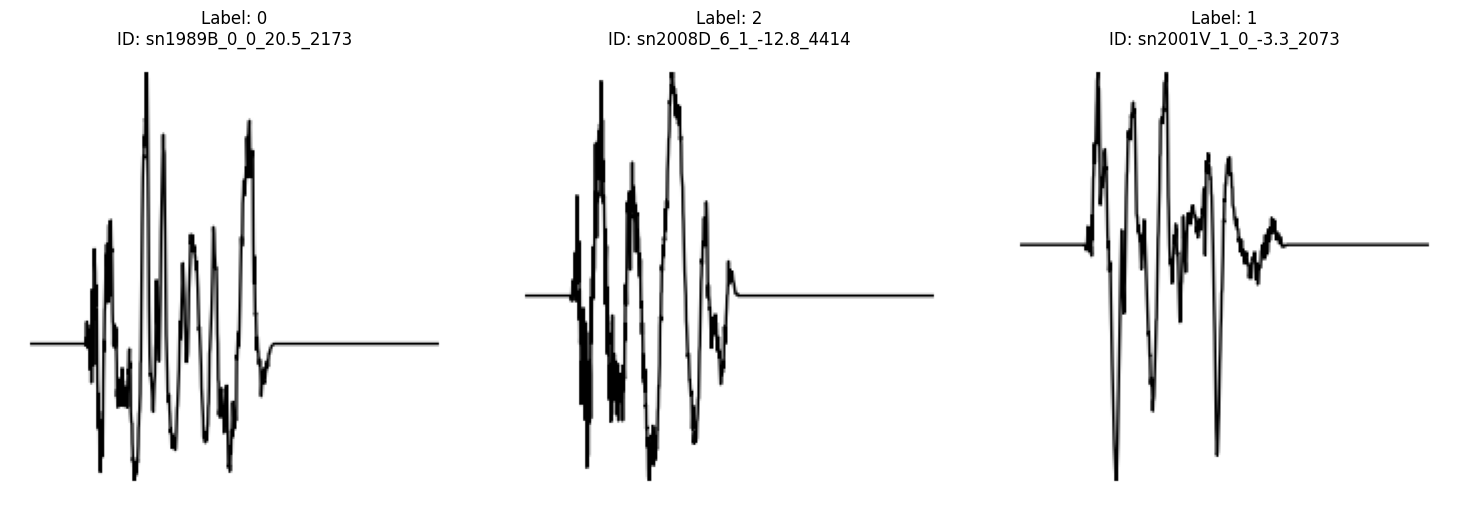

In [81]:
# prompt: add title for each plotted image

num_images = len(train_data['pixel_values'])
random_indices = random.sample(range(num_images), 3)
images = [train_data['pixel_values'][i] for i in random_indices]
labels = [train_data['y_true'][i] for i in random_indices]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axs):
    ax.imshow(images[i], 'gray')
    ax.axis('off')
    ax.set_title(f"Label: {labels[i]}\nID: {train_data['id'][random_indices[i]]}")

plt.tight_layout()
#plt.savefig('3random_images.png', dpi=150)
plt.show()

In [80]:
# # Optional: export dictionary as a torch file

#import torch
# torch.save(train_data, '/content/drive/MyDrive/lssds24/train_data.pt')

In [82]:
len(train_data['id'])

5000

In [83]:
for i in range(len(train_data['id'])):
  train_data['id'][i] = train_data['id'][i].split('_')[0]

In [84]:
# prompt: group 'train_data' by unique values on the 'id' key, but one of the keys is a list of arrays

from collections import defaultdict

grouped_data = defaultdict(lambda: {'pixel_values': [], 'y_true': []})

for i in range(len(train_data['id'])):
  id = train_data['id'][i]
  grouped_data[id]['pixel_values'].append(train_data['pixel_values'][i])
  grouped_data[id]['y_true'].append(train_data['y_true'][i])

# Convert lists to tensors
for id in grouped_data:
  grouped_data[id]['pixel_values'] = torch.stack(grouped_data[id]['pixel_values'])
  grouped_data[id]['y_true'] = torch.stack(grouped_data[id]['y_true'])


In [85]:
# prompt: now split it in train, val and test with proportions 0.7, 0.15, 0.15 but stratified by the three classes on the values of 'y_true'

import random
from sklearn.model_selection import train_test_split

# Separate IDs by class
ids_by_class = defaultdict(list)
for id, data in grouped_data.items():
  ids_by_class[data['y_true'][0].item()].append(id)

# Split IDs for each class
train_ids = []
val_ids = []
test_ids = []

for class_id, ids in ids_by_class.items():
  train, temp = train_test_split(ids, test_size=0.3, random_state=42, stratify=[class_id]*len(ids))
  val, test = train_test_split(temp, test_size=0.5, random_state=42, stratify=[class_id]*len(temp))
  train_ids.extend(train)
  val_ids.extend(val)
  test_ids.extend(test)

# Create train, val, and test sets
train_data_split = {k: [] for k in train_data.keys()}
val_data_split = {k: [] for k in train_data.keys()}
test_data_split = {k: [] for k in train_data.keys()}

for id in train_ids:
  train_data_split['id'].extend([id + f'_{i}' for i in range(len(grouped_data[id]['pixel_values']))])
  train_data_split['pixel_values'].extend(grouped_data[id]['pixel_values'])
  train_data_split['y_true'].extend(grouped_data[id]['y_true'])

for id in val_ids:
  val_data_split['id'].extend([id + f'_{i}' for i in range(len(grouped_data[id]['pixel_values']))])
  val_data_split['pixel_values'].extend(grouped_data[id]['pixel_values'])
  val_data_split['y_true'].extend(grouped_data[id]['y_true'])

for id in test_ids:
  test_data_split['id'].extend([id + f'_{i}' for i in range(len(grouped_data[id]['pixel_values']))])
  test_data_split['pixel_values'].extend(grouped_data[id]['pixel_values'])
  test_data_split['y_true'].extend(grouped_data[id]['y_true'])

# Convert lists to tensors
train_data_split['pixel_values'] = torch.stack(train_data_split['pixel_values'])
train_data_split['y_true'] = torch.stack(train_data_split['y_true']).squeeze()
val_data_split['pixel_values'] = torch.stack(val_data_split['pixel_values'])
val_data_split['y_true'] = torch.stack(val_data_split['y_true']).squeeze()
test_data_split['pixel_values'] = torch.stack(test_data_split['pixel_values'])
test_data_split['y_true'] = torch.stack(test_data_split['y_true']).squeeze()

In [86]:
# prompt: check that there are no repeated strings in train_data_split['id'] and val_data_split['id']

# Check for repeated strings in train_data_split['id']
train_ids = train_data_split['id']
val_ids = val_data_split['id']
test_ids = test_data_split['id']

In [87]:
# checking that the split worked, there shouldn't be reapeated SNs in train and val
for i in train_ids:
  for k in val_ids:
    if i == k:
      print(i)

In [88]:
# check if the split is balanced on unique SNs??

In [89]:
print(len(train_data_split['id']), len(val_data_split['id']), len(test_data_split['id']))

3706 693 601


In [90]:
ytrue = np.array(train_data['y_true'])

In [91]:
# prompt: calculate the weights by the classes in key 'y_true' of train_data

import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(ytrue),
                                     y=ytrue)
class_weights = torch.tensor(class_weights, dtype=torch.float)

print(class_weights)

tensor([0.6982, 1.8498, 0.9735])


In [90]:
# # prompt: separate train_data in train, test and validation

# import random

# # Set the proportions for each set
# train_ratio = 0.7
# test_ratio = 0.15
# val_ratio = 0.15

# # Get the total number of samples
# num_samples = len(train_data['id'])

# # Create indices for splitting
# indices = list(range(num_samples))
# random.shuffle(indices)

# train_split = int(train_ratio * num_samples)
# test_split = int((train_ratio + test_ratio) * num_samples)

# train_indices = indices[:train_split]
# test_indices = indices[train_split:test_split]
# val_indices = indices[test_split:]

# # Create the separate datasets
# train_data_split = {key: [train_data[key][i] for i in train_indices] for key in train_data}
# train_data_split['pixel_values'] = torch.stack(train_data_split['pixel_values'])
# train_data_split['y_true'] = torch.stack(train_data_split['y_true'])
# test_data_split = {key: [train_data[key][i] for i in test_indices] for key in train_data}
# test_data_split['pixel_values'] = torch.stack(test_data_split['pixel_values'])
# test_data_split['y_true'] = torch.stack(test_data_split['y_true'])
# val_data_split = {key: [train_data[key][i] for i in val_indices] for key in train_data}
# val_data_split['pixel_values'] = torch.stack(val_data_split['pixel_values'])
# val_data_split['y_true'] = torch.stack(val_data_split['y_true'])

In [92]:
test_data_split['pixel_values'][0].shape

torch.Size([224, 224, 3])

# Dataloader

In [93]:
dict_mapping_classes = {
  'Ia-norm': 0,
  'Ia-pec': 1,
  'Others': 2,
  }

inv_dict_mapping_classes = {value: key for key, value in dict_mapping_classes.items()}

In [94]:
inv_dict_mapping_classes = {'Ia-norm': 0, 'Ia-pec':1, 'Others':2}

print(inv_dict_mapping_classes)

{'Ia-norm': 0, 'Ia-pec': 1, 'Others': 2}


In [95]:
num_classes = len(np.unique(train_data['y_true']))
num_classes

3

In [96]:
type(train_data_split['y_true'])

torch.Tensor

In [97]:
batch_size = 64

class CustomDataset(Dataset):
    def __init__(self, data):
        self.ids = data['id']
        # self.pixel_values = torch.from_numpy(data['pixel_values']).float()
        self.pixel_values = data['pixel_values'].float()
        # self.y_true = torch.from_numpy(data['y_true']).long()
        self.y_true = data['y_true'].long()

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        return {
            'id': self.ids[idx],
            'pixel_values': self.pixel_values[idx],
            'y_true': self.y_true[idx]
        }

train_dataset = CustomDataset(train_data_split)
val_dataset = CustomDataset(val_data_split)
test_dataset = CustomDataset(test_data_split)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Finetuning

### Model

In [96]:
# prompt: load train_data.pt from google colab if variable not exist

# from google.colab import files
# if 'train_data' not in locals():
#   uploaded = files.upload()
#   train_data = torch.load(io.BytesIO(uploaded['train_data.pt']))


In [98]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

pt_model_name = 'google/vit-base-patch32-224-in21k'
processor = ViTImageProcessor.from_pretrained(pt_model_name)
model = ViTModel.from_pretrained(pt_model_name).to(device)

classifier = nn.Linear(model.config.hidden_size, num_classes).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/352M [00:00<?, ?B/s]

In [99]:
def train_step(batch_data, model, processor, classifier, optimizer, device):
    model.train()
    y_true = batch_data['y_true'].to(device)

    inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
    outputs = model(**inputs)
    pooled_output = outputs.last_hidden_state[:, 0, :]

    weights = torch.tensor([0.6982, 1.8498, 0.9735], device="cuda")
    logits = classifier(pooled_output)
    loss = F.cross_entropy(logits, y_true, weight=weights)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred = torch.argmax(logits, dim=-1)
    return loss.item(), y_pred, y_true


def validate_step(batch_data, model, processor, classifier, device):
    model.eval()
    with torch.no_grad():
        y_true = batch_data['y_true'].to(device)

        inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
        outputs = model(**inputs)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        logits = classifier(pooled_output)
        weights = torch.tensor([0.6982, 1.8498, 0.9735], device="cuda")
        loss = F.cross_entropy(logits, y_true, weight=weights)

        y_pred = torch.argmax(logits, dim=-1)
        return loss.item(), y_pred, y_true


def predict_step(batch_data, model, processor, classifier, device):
    model.eval()
    with torch.no_grad():
        y_true = batch_data['y_true'].to(device)

        inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
        outputs = model(**inputs)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        logits = classifier(pooled_output)
        y_pred_prob = F.softmax(logits, dim=1)
        y_pred = torch.argmax(logits, dim=-1)

        return {
            'id': batch_data['id'],
            'y_pred': y_pred.cpu().numpy(),
            'y_pred_prob': y_pred_prob.cpu().numpy(),
            'y_true': y_true.cpu().numpy()
        }

In [100]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [106]:
lr = 2e-5 # 5.0e-6
num_epochs = 1000
patience = 7
best_val_f1 = 0.0
patience_counter = 0
best_model_path = 'best_model_vit.pth'  # Ruta donde se guardará el mejor modelo

params = list(model.parameters()) + list(classifier.parameters())
optimizer = optim.Adam(params, lr=lr)

# Inicializar métricas F1
f1_train = F1Score(task="multiclass", num_classes=num_classes, average='macro').to(device)
f1_val = F1Score(task="multiclass", num_classes=num_classes, average='macro').to(device)

# Bucle de entrenamiento y validación
for epoch in range(num_epochs):
    # Resetear métricas para cada epoch
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    f1_train.reset()

    model.train()
    for batch_idx, batch_data in enumerate(train_dataloader):
        loss, y_pred, y_true = train_step(batch_data, model, processor, classifier, optimizer, device)

        train_loss += loss
        train_correct += (y_pred == y_true).sum()
        train_total += y_true.size(0)

        # Actualizar F1 Score para el conjunto de entrenamiento
        f1_train.update(y_pred, y_true)

    train_loss /= len(train_dataloader)
    train_accuracy = 100. * train_correct / train_total
    train_f1_score = f1_train.compute()

    # Validación
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    f1_val.reset()

    model.eval()
    with torch.no_grad():
        for batch_idx, batch_data in enumerate(val_dataloader):
            loss, y_pred, y_true = validate_step(batch_data, model, processor, classifier, device)

            val_loss += loss
            val_correct += (y_pred == y_true).sum()
            val_total += y_true.size(0)

            # Actualizar F1 Score para el conjunto de validación
            f1_val.update(y_pred, y_true)

    val_loss /= len(val_dataloader)
    val_accuracy = 100. * val_correct / val_total
    val_f1_score = f1_val.compute()

    # Imprimir resultados de la época
    print(f'Epoch {epoch+1}/{num_epochs} | '
          f'Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.2f}% | Train F1: {train_f1_score:.4f} | '
          f'Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.2f}% | Val F1: {val_f1_score:.4f}')

    # Early stopping basado en el F1 Score de validación y guardado del mejor modelo
    if val_f1_score > best_val_f1:
        best_val_f1 = val_f1_score
        patience_counter = 0  # Restablecer el contador de paciencia
        torch.save(model.state_dict(), best_model_path)  # Guardar el mejor modelo
        print(f"New best model saved at epoch {epoch+1}")
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered.")
        break

print(f"Training complete. Best model saved with F1 Score: {best_val_f1:.4f}")

Epoch 1/1000 | Train Loss: 0.8935 | Train Acc: 67.65% | Train F1: 0.6171 | Val Loss: 0.7332 | Val Acc: 70.85% | Val F1: 0.6814
New best model saved at epoch 1
Epoch 2/1000 | Train Loss: 0.5208 | Train Acc: 84.62% | Train F1: 0.8069 | Val Loss: 0.5201 | Val Acc: 79.37% | Val F1: 0.7761
New best model saved at epoch 2
Epoch 3/1000 | Train Loss: 0.3249 | Train Acc: 89.85% | Train F1: 0.8745 | Val Loss: 0.4885 | Val Acc: 77.92% | Val F1: 0.7866
New best model saved at epoch 3
Epoch 4/1000 | Train Loss: 0.2018 | Train Acc: 94.58% | Train F1: 0.9318 | Val Loss: 0.4229 | Val Acc: 82.40% | Val F1: 0.8313
New best model saved at epoch 4
Epoch 5/1000 | Train Loss: 0.1300 | Train Acc: 97.22% | Train F1: 0.9647 | Val Loss: 0.4550 | Val Acc: 84.13% | Val F1: 0.8295
Epoch 6/1000 | Train Loss: 0.0808 | Train Acc: 98.76% | Train F1: 0.9844 | Val Loss: 0.4612 | Val Acc: 85.28% | Val F1: 0.8386
New best model saved at epoch 6
Epoch 7/1000 | Train Loss: 0.0531 | Train Acc: 99.62% | Train F1: 0.9957 | Val

## Inference

Here, you should use the test data; however, I will use the validation data.

In [137]:
# Cargar el mejor modelo guardado
model.load_state_dict(torch.load(best_model_path, weights_only=True))
model.eval()

outputs = []
with torch.no_grad():
    for batch_data in test_dataloader:
        outputs.append(predict_step(batch_data, model, processor, classifier, device))

In [138]:
outputs[0].keys()

dict_keys(['id', 'y_pred', 'y_pred_prob', 'y_true'])

In [139]:
keys = outputs[0].keys()
outputs_dict = {key: [] for key in keys}

for i in range(len(outputs)):
    for key in keys:
        outputs_dict[key].append(outputs[i][key])

outputs_dict = {key: np.concatenate(values) for key, values in outputs_dict.items()}
# outputs_dict

In [140]:
outputs_dict['y_true'] = [inv_dict_mapping_classes[val] for val in outputs_dict['y_true']]
outputs_dict['y_pred'] = [inv_dict_mapping_classes[val] for val in outputs_dict['y_pred']]

In [141]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(outputs_dict['y_true'], outputs_dict['y_pred'], digits=4))

              precision    recall  f1-score   support

     Ia-norm     0.9160    0.9211    0.9185       355
      Ia-pec     0.6479    0.5610    0.6013        82
      Others     0.9306    0.9817    0.9555       164

    accuracy                         0.8885       601
   macro avg     0.8315    0.8213    0.8251       601
weighted avg     0.8834    0.8885    0.8853       601



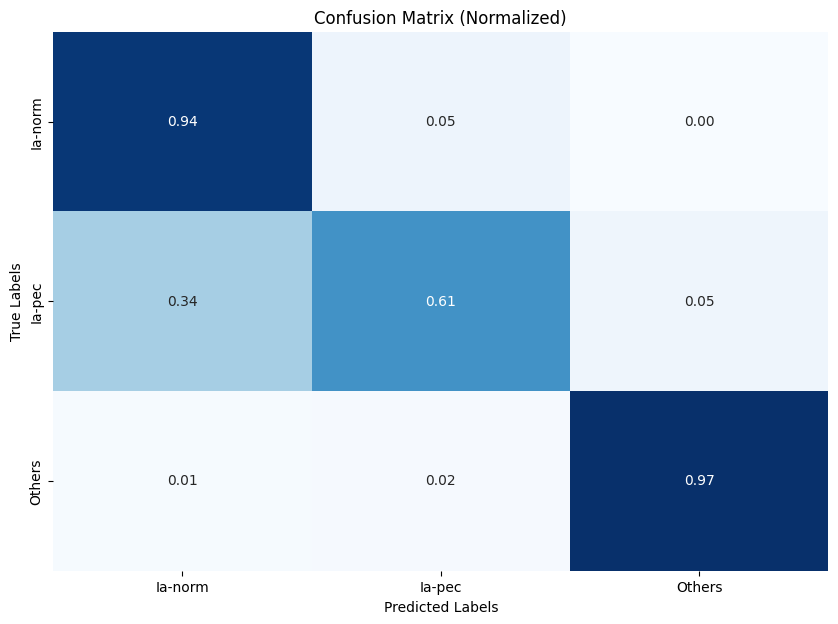

In [144]:
# Crear la matriz de confusión
cm = confusion_matrix(outputs_dict['y_true'], outputs_dict['y_pred'])

# Normalizar la matriz de confusión por filas (verdaderos)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Obtener los nombres de las clases desde el diccionario
class_names = inv_dict_mapping_classes.values()

# Dibujar el heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.savefig('confusion_matrix_val_data.png', dpi=200)
plt.show()

<ipython-input-145-75973d66582b>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


              precision    recall  f1-score   support

     Ia-norm     0.8338    0.9441    0.8855       340
      Ia-pec     0.8397    0.6077    0.7051       181
      Others     0.9435    0.9709    0.9570       172

    accuracy                         0.8629       693
   macro avg     0.8723    0.8409    0.8492       693
weighted avg     0.8626    0.8629    0.8561       693



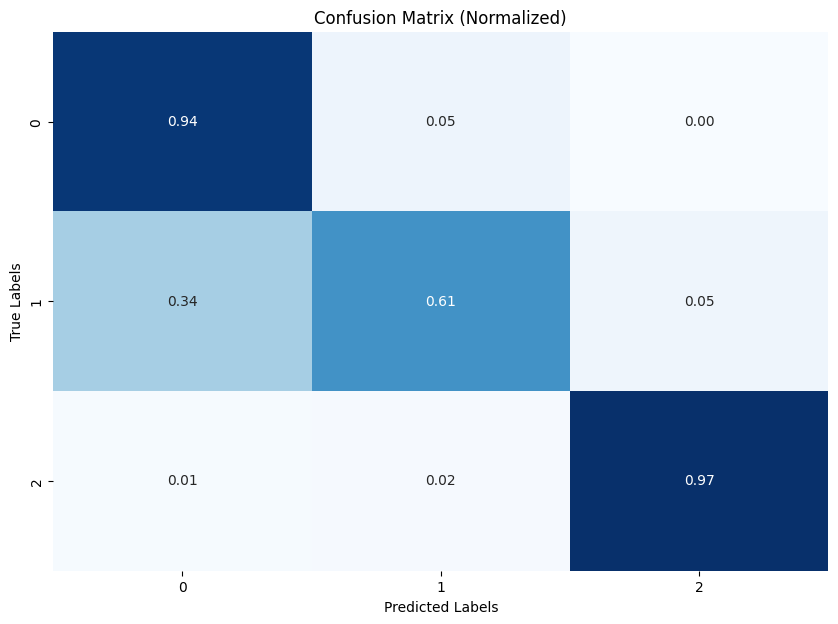

In [145]:
# prompt: do now the confusion matrix for val_data

# Cargar el mejor modelo guardado
model.load_state_dict(torch.load(best_model_path))
model.eval()

outputs = []
with torch.no_grad():
  for batch_data in val_dataloader:
    outputs.append(predict_step(batch_data, model, processor, classifier, device))

keys = outputs[0].keys()
outputs_dict = {key: [] for key in keys}

for i in range(len(outputs)):
  for key in keys:
    outputs_dict[key].append(outputs[i][key])

outputs_dict = {key: np.concatenate(values) for key, values in outputs_dict.items()}

outputs_dict['y_true'] = [inv_dict_mapping_classes[val] for val in outputs_dict['y_true']]
outputs_dict['y_pred'] = [inv_dict_mapping_classes[val] for val in outputs_dict['y_pred']]

print(classification_report(outputs_dict['y_true'], outputs_dict['y_pred'], digits=4))

# Crear la matriz de confusión
cm = confusion_matrix(outputs_dict['y_true'], outputs_dict['y_pred'])

# Normalizar la matriz de confusión por filas (verdaderos)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Obtener los nombres de las clases desde el diccionario
class_names = list(inv_dict_mapping_classes.keys())

# Dibujar el heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.savefig('confusion_matrix_test_data.png', dpi=200)
plt.show()


In [134]:
# history = Classifier.fit(x = np.reshape(x_train, (shape_0, shape_1, shape_2)), y = y_train,
#                                     epochs=5000,
#                                     batch_size=512,
#                                     shuffle=True,
#                                     validation_data=(x_test, y_test),
#                                     verbose=2,
#                                     callbacks=[es, mc]
#                                     )
#                 TrnAcc = np.array(history.history['accuracy'])
#                 TstAcc = np.array(history.history['val_accuracy'])
#                 TrnLoss = np.array(history.history['loss'])
#                 TstLoss = np.array(history.history['val_loss'])
#                 print(f"\n Layers = {layer}, DL= {DL}, Fil = {fil}, KS = {ks}, ANT = {ANT}")
#                 print("TrnAcc = {0}".format(max(TrnAcc)))
#                 print("TstAcc = {0}".format(max(TstAcc)))
#                 np.save(LossAccDir + f'/TrnAcc_Layers={layer}_DL={DL}_Fil={fil}_KS={ks}_ANT={ANT}_lr={lr}.npy', TrnAcc)
#                 np.save(LossAccDir + f'/TstAcc_Layers={layer}_DL={DL}_Fil={fil}_KS={ks}_ANT={ANT}_lr={lr}.npy', TstAcc)
#                 np.save(LossAccDir + f'/TrnLoss_Layers={layer}_DL={DL}_Fil={fil}_KS={ks}_ANT={ANT}_lr={lr}.npy', TrnLoss)
#                 np.save(LossAccDir + f'/TstLoss_Layers={layer}_DL={DL}_Fil={fil}_KS={ks}_ANT={ANT}_lr={lr}.npy', TstLoss)

#                 NRows = 1
#                 NCols = 2
#                 gs = gridspec.GridSpec(NRows, NCols, wspace=0.3, hspace=0.3)
#                 fig = plt.figure(figsize=(6*NCols, 5*NRows))
#                 ax = fig.add_subplot(gs[0])
#                 ax.plot(TrnLoss, label='TrainLoss')
#                 ax.plot(TstLoss, label='TestLoss')
#                 ax.set_xlabel("Epochs")
#                 ax.set_ylabel("Loss")
#                 ax.set_yscale("log")
#                 ax.legend(loc='best', prop={'size': 8})
#                 ax = fig.add_subplot(gs[1])
#                 ax.plot(TrnAcc, label='TrainAccuracy')
#                 ax.plot(TstAcc, label='TestAccuracy')
#                 ax.set_title(f"Layers={layer}_DL={DL}_Fil={fil}_KS={ks}_ANT={ANT}_lr={lr}")
#                 ax.set_xlabel("Epochs")
#                 ax.set_ylabel("Accuracy")
#                 ax.legend(loc='best', prop={'size': 8})
#                 fig.savefig(PlotsDir + f"/Classifier_{dataset}_MSE_Layers={layer}_DL={DL}_Fil={fil}_KS={ks}_ANT={ANT}_lr={lr}.pdf", bbox_inches='tight')

### CLIP

In [133]:
from transformers import CLIPProcessor, CLIPModel

In [132]:
prompts = {
    'Ia-norm': 'a spectrum of a Type Ia supernova',
    'Ia-pec': 'a spectrum of a Type Ia peculiar supernova',
    'Others': 'a spectrum of a not Type Ia supernova',
}

In [147]:
model

ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTSdpaAttention(
          (attention): ViTSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUAct

In [149]:
# pt_model_name = 'openai/clip-vit-base-patch32'
# processor = CLIPProcessor.from_pretrained(pt_model_name)
# clip_model = CLIPModel.from_pretrained(pt_model_name).to(device)
# clip_classifier = CLIPClassifier(model, clip_model, num_classes, prompts).to(device)

In [150]:
# pt_model_name_clip = 'openai/clip-vit-base-patch32'
# processor_clip = CLIPProcessor.from_pretrained(pt_model_name)
# model_clip = CLIPModel.from_pretrained(pt_model_name).to(device)

In [ ]:
# def compute_img_to_text_similarity(batch_data, model, processor):
#     inputs = processor(text=list(prompts.values()),
#                             images=batch_data['pixel_values'],
#                             return_tensors="pt",
#                             padding=True,
#                             truncation=True).to(device)
#     outputs = model(**inputs)
#     logits_per_image = outputs.logits_per_image
#     y_pred_prob = logits_per_image.softmax(dim=1)
#     return y_pred_prob


# def train_step(batch_data, model, processor, optimizer, device):
#     model.train()
#     y_true = batch_data['y_true'].to(device)

#     inputs = processor(text=batch_data['texts'],
#                        images=batch_data['pixel_values'],
#                        return_tensors="pt",
#                        padding=True,
#                        truncation=True).to(device)
#     outputs = model(**inputs, return_loss=True)
#     loss = outputs.loss

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     y_pred_prob = compute_img_to_text_similarity(batch_data, model, processor)
#     y_pred = torch.argmax(y_pred_prob, dim=-1)
#     return loss.item(), y_pred, y_true


# def validate_step(batch_data, model, processor, device):
#     model.eval()
#     with torch.no_grad():
#         y_true = batch_data['y_true'].to(device)

#         inputs = processor(text=batch_data['texts'],
#                         images=batch_data['pixel_values'],
#                         return_tensors="pt",
#                         padding=True,
#                         truncation=True).to(device)
#         outputs = model(**inputs, return_loss=True)
#         loss = outputs.loss

#         y_pred_prob = compute_img_to_text_similarity(batch_data, model, processor)
#         y_pred = torch.argmax(y_pred_prob, dim=-1)
#         return loss.item(), y_pred, y_true


# def predict_step(batch_data, model, processor, device):
#     model.eval()
#     with torch.no_grad():
#         y_true = batch_data['y_true'].to(device)

#         inputs = processor(text=batch_data['texts'],
#                         images=batch_data['pixel_values'],
#                         return_tensors="pt",
#                         padding=True,
#                         truncation=True).to(device)
#         outputs = model(**inputs, return_loss=True)
#         loss = outputs.loss

#         y_pred_prob = compute_img_to_text_similarity(batch_data, model, processor)
#         y_pred = torch.argmax(y_pred_prob, dim=-1)

#         return {
#             'id': batch_data['id'],
#             'y_pred': y_pred.cpu().numpy(),
#             'y_pred_prob': y_pred_prob.cpu().numpy(),
#             'y_true': y_true.cpu().numpy()
#         }